In [2]:
import sys
sys.executable

'/usr/local/opt/python/bin/python3.7'

In [57]:
import numpy as np
import math
from gPRM import gPRM
from gPRM_utils import dijkstra
import matplotlib.pyplot as plt

In [50]:
D = 2
n = 1000
r = 0.1
num_simulations = 1
seed = 170000
np.random.seed(seed)      # seeding

relevant=True

x_init = np.array([0.1] * D)
x_goal = np.array([0.9] * D)
true_distance = np.linalg.norm(x_init - x_goal)

path=None

G = gPRM(n, D, x_init, x_goal)

In [51]:
# the actual simulations
i = 0
while i < (num_simulations):
    G.sample_points()
    G.run_simulation(r)
    
    # if the algorithm fails to return a path
    if G.get_length() < -0.5:
        i += 1
        continue
        
    relative_error = G.get_error() / true_distance
    path = G.get_path()
    print(relative_error)
    print(path)
                
    i += 1

0.0076619919477347075
(0, 651, 342, 353, 698, 941, 536, 491, 742, 500, 256, 986, 900, 350, 589, 535, 1001)


In [52]:
# construct points, path points, and init points
points = np.array(G.get_V())
path_points = np.vstack(points[ve] for ve in path[1:-1])
init_points = np.array([x_init, x_goal])

x, y = points.T 
x_pp, y_pp = path_points.T
x_ip, y_ip = init_points.T

edges = []
for e in G.get_E():
    # e[0] is the index for the tail, e[1] is the index for the head
    tail = e[0]
    head = e[1]
    if relevant:
        if (tail not in path) and (head not in path):
            continue
    edges.append(np.array([points[tail], points[head]]))
#edges = np.array(edges)

path_edges = []
for j in range(len(path)-1):
    path_edges.append(np.array([points[path[j]], points[path[j+1]]]))
path_edges = np.array(path_edges)




/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


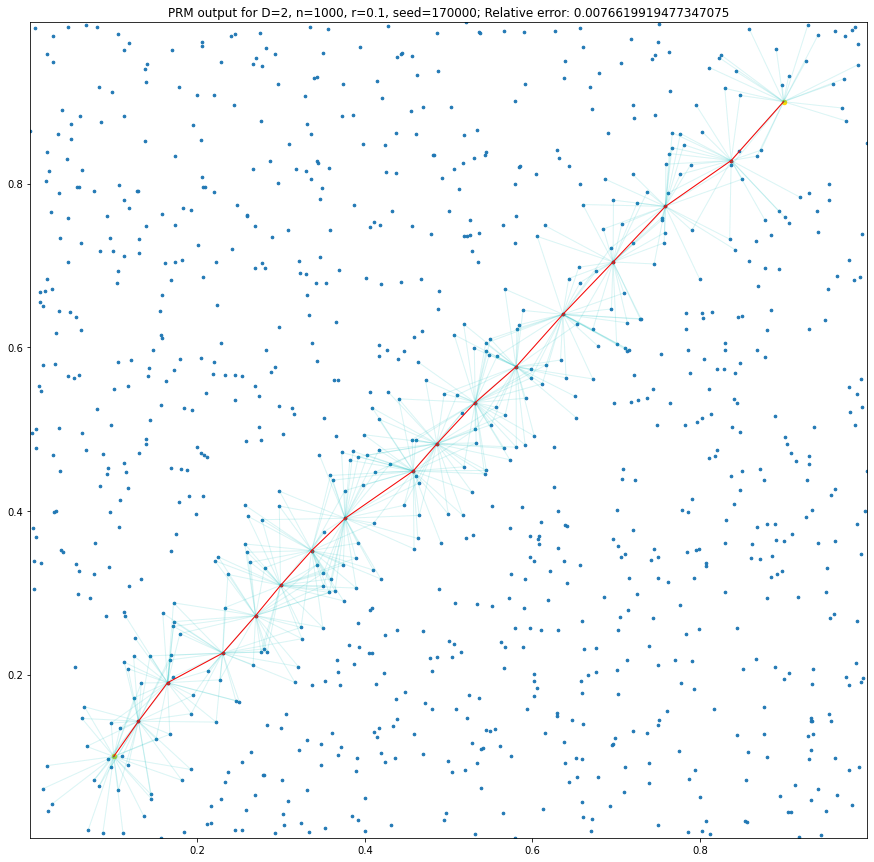

In [79]:
# plot points here
plt.figure(figsize=(15,15))
plt.margins(x=0.00, y=0.00)

plt.scatter(x, y, s=7)
plt.scatter(x_pp, y_pp, s=7, c='red')
plt.scatter(x_ip, y_ip, s=20, c='gold')
  
for edge in edges:
    xe, ye = edge.T
    plt.plot(xe, ye, 'c-', linewidth=1, alpha=0.075)
for edge in path_edges:
    xs, ys = edge.T
    plt.plot(xs, ys, 'r-', linewidth=1)
    
plt.title('PRM output for D='+str(D)+', n='+str(n)+', r='
          +str(r)+', seed='+str(seed)
          +'; Relative error: '+str(relative_error))

plt.savefig('sample.png')

plt.show()


In [58]:
# scatterplot of edges on returned path, x axis measures length and y axis measures angle from x_goal
x_scatter = []
y_scatter = []
for ix in range(len(path)-1):
    vect_1 = points[path[ix+1]] - points[path[ix]]
    vect_2 = x_goal - points[path[ix]]
    x_scatter.append(np.linalg.norm(vect_1))
    angle = math.atan2( vect_1[0]*vect_2[1] - vect_1[1]*vect_2[0], vect_1[0]*vect_2[0] + vect_1[1]*vect_2[1])
    y_scatter.append(angle)
    

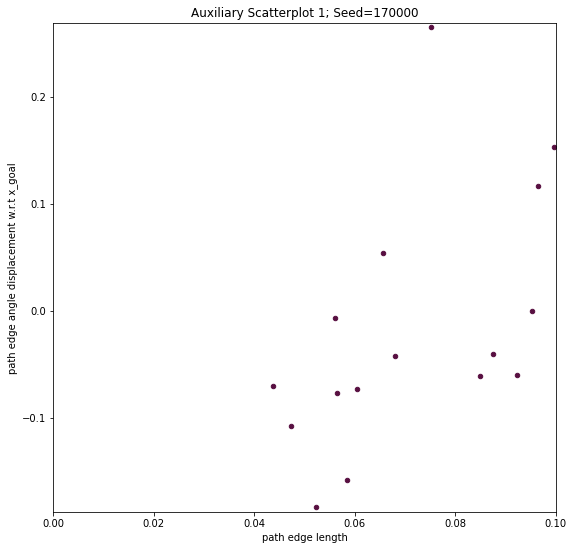

In [73]:
# plot the scatterplot
plt.figure(figsize=(9,9))
axes = plt.gca()
axes.set_xlim([0,0.1])
axes.margins(y=0.01)

plt.scatter(x_scatter, y_scatter, s=20, c='xkcd:plum')
plt.title('Auxiliary Scatterplot 1; Seed='+str(seed))
plt.xlabel('path edge length')
plt.ylabel('path edge angle displacement w.r.t x_goal')
plt.savefig('sample2.png')
plt.show()